In [1]:
import torch
import numpy as np
import pandas as pd
import json
import os
from transformers import pipeline
from datetime import datetime as dt
from torch.utils.data import Dataset
from tqdm import tqdm

# Loading Cresci-2017 data

In [3]:
import datetime
from pytz import timezone

bot_accounts = pd.concat([pd.read_csv('data/social_spambots_1.csv'), pd.read_csv('data/social_spambots_2.csv'), pd.read_csv('data/social_spambots_3.csv')]).reset_index(drop=True)
clean_accounts = pd.read_csv('data/geniune_accounts.csv')

requiredColumns = ['screen_name', 'created_at', 'updated', 'location', 'verified', 'statuses_count', 'friends_count','followers_count', 'favourites_count', 'default_profile_image', 'profile_use_background_image', 'protected', 'default_profile']
bot_accounts = bot_accounts#[requiredColumns]
clean_accounts = clean_accounts#[requiredColumns]

def clean_df(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['updated'] = pd.to_datetime(df['updated'])
    #print(df['updated'])
    #print()
    #print(df['created_at'])
    df['age'] = ((df['updated'].dt.tz_localize('UTC') - df['created_at']) / np.timedelta64(1, 'D')).astype('int') #modified this line from original repo code.
    #df['age'] = (df['updated'].dt.tz_localize('UTC') - df['created_at']).astype('timedelta64[D]').astype(int)
    #print(df['age'])
    df['has_location'] = df['location'].apply(lambda x: 0 if x==x else 1)
    df['has_avatar'] = df['default_profile_image'].apply(lambda x: 1 if x==x else 0)
    df['has_background'] = df['profile_use_background_image'].apply(lambda x: 1 if x==x else 0)
    df['is_verified']=df['verified'].apply(lambda x: 1 if x==x else 0)
    df['is_protected']=df['protected'].apply(lambda x: 1 if x==x else 0)
    df['profile_modified'] = df['default_profile'].apply(lambda x: 0 if x==x else 1)

    #properties=['protected','geo_enabled','verified','contributors_enabled','is_translator','is_translation_enabled','profile_background_tile','profile_use_background_image','has_extended_profile','default_profile','default_profile_image']
    
    return df[['id', 'screen_name', 'age', 'has_location', 'is_verified', 'statuses_count', 'friends_count', 'followers_count', 'favourites_count', 'has_avatar', 'has_background', 'is_protected', 'profile_modified', 'protected', 'geo_enabled','verified','contributors_enabled','is_translator','profile_background_tile','profile_use_background_image','default_profile','default_profile_image', 'description']]

bot_accounts = clean_df(bot_accounts)
clean_accounts = clean_df(clean_accounts)

bot_accounts['BotOrNot'] = 1
clean_accounts['BotOrNot'] = 0

combined_df = pd.concat([bot_accounts, clean_accounts], ignore_index=True)

C:\Users\lukez\AppData\Local\Temp\ipykernel_30512\815080372.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])
C:\Users\lukez\AppData\Local\Temp\ipykernel_30512\815080372.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


# Extracting Tweet Data for accounts

In [7]:
#tweet step
user_idx=combined_df['id']
uid_index={uid:index for index,uid in enumerate(user_idx.values)}

In [15]:

print("extracting each_user's tweets")
id_tweet={i:[] for i in range(len(user_idx))}

user_tweets=pd.read_csv('data/social_spambots_1_tweets.csv', encoding_errors= 'ignore')

for index, row in user_tweets.iterrows():
    #print(row)
    uid=row['user_id']
    text=row['text']
    try:
        index=uid_index[uid]
        id_tweet[index].append(text)
        #print("Success:",uid)
    except KeyError:
        #print("Fail:",uid)
        continue
print("file1 Done")

#file = open('data/social_spambots_2_tweets.csv', errors='ignore')
user_tweets=pd.read_csv('data/social_spambots_2_tweets.csv', encoding_errors= 'ignore')

for index, row in user_tweets.iterrows():
    #print(row)
    uid=row['user_id']
    text=row['text']
    try:
        index=uid_index[uid]
        id_tweet[index].append(text)
        #print("Success:",uid)
    except KeyError:
        #print("Fail:",uid)
        continue
print("file2 Done")

#file = open('data/social_spambots_2_tweets.csv', errors='ignore')
user_tweets=pd.read_csv('data/social_spambots_3_tweets.csv', encoding_errors= 'ignore')

for index, row in user_tweets.iterrows():
    #print(row)
    uid=row['user_id']
    text=row['text']
    try:
        index=uid_index[uid]
        id_tweet[index].append(text)
        #print("Success:",uid)
    except KeyError:
        #print("Fail:",uid)
        continue
print("file3 Done")

#file = open('data/social_spambots_2_tweets.csv', errors='ignore')
user_tweets=pd.read_csv('data/geniune_accounts_tweets.csv', encoding_errors= 'ignore')

for index, row in user_tweets.iterrows():
    #print(row)
    uid=row['user_id']
    text=row['text']
    try:
        index=uid_index[uid]
        id_tweet[index].append(text)
        #print("Success:",uid)
    except KeyError:
        #print("Fail:",uid)
        continue

json.dump(id_tweet,open('./processed_data/id_tweet.json','w'))

extracting each_user's tweets


C:\Users\lukez\AppData\Local\Temp\ipykernel_35476\330333828.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  user_tweets=pd.read_csv('data/social_spambots_1_tweets.csv', encoding_errors= 'ignore')


file1 Done


C:\Users\lukez\AppData\Local\Temp\ipykernel_35476\330333828.py:20: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  user_tweets=pd.read_csv('data/social_spambots_2_tweets.csv', encoding_errors= 'ignore')


file2 Done


C:\Users\lukez\AppData\Local\Temp\ipykernel_35476\330333828.py:36: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  user_tweets=pd.read_csv('data/social_spambots_3_tweets.csv', encoding_errors= 'ignore')


file3 Done


C:\Users\lukez\AppData\Local\Temp\ipykernel_35476\330333828.py:52: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_tweets=pd.read_csv('data/geniune_accounts_tweets.csv', encoding_errors= 'ignore')


In [25]:
from transformers import pipeline

each_user_tweets=json.load(open("processed_data/id_tweet.json",'r'))

feature_extract=pipeline('feature-extraction',model='roberta-base',tokenizer='roberta-base',device=3,padding=True, truncation=True,max_length=50, add_special_tokens = True)

print('Running feature2 embedding')
path="./processed_data/tweets_tensor.pt"
if True:
    tweets_list=[]
    for i in tqdm(range(len(each_user_tweets))):
        if len(each_user_tweets[str(i)])==0:
            total_each_person_tweets=torch.zeros(768)
        else:
            for j in range(len(each_user_tweets[str(i)])):
                each_tweet=each_user_tweets[str(i)][j]
                #print(each_tweet)
                if each_tweet is None:
                    total_word_tensor=torch.zeros(768)
                else:
                    try:
                        each_tweet_tensor=torch.tensor(feature_extract(each_tweet))
                        for k,each_word_tensor in enumerate(each_tweet_tensor[0]):
                            if k==0:
                                total_word_tensor=each_word_tensor
                            else:
                                total_word_tensor+=each_word_tensor
                        total_word_tensor/=each_tweet_tensor.shape[1]
                    except:
                        total_word_tensor=torch.zeros(768)
                if j==0:
                    total_each_person_tweets=total_word_tensor
                elif j==20:
                    break
                else:
                    total_each_person_tweets+=total_word_tensor
            if (j==20):
                total_each_person_tweets/=20
            else:
                total_each_person_tweets/=len(each_user_tweets[str(i)])
                
        tweets_list.append(total_each_person_tweets)
            
    tweet_tensor=torch.stack(tweets_list)
    torch.save(tweet_tensor,"./processed_data/tweets_tensor.pt")
                
else:
    tweets_tensor=torch.load(path)
print('Finished')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


Running feature2 embedding


100%|██████████| 8386/8386 [1:36:54<00:00,  1.44it/s]  

Finished


# Extracting other features from Accounts

In [10]:
def load_labels1(df, root='./processed_data/', save=True, device='cpu'):
    print('Loading labels...',end='   ')
    path=root+'label.pt'
    if not os.path.exists(path):
        labels=torch.LongTensor(df['BotOrNot']).to(device)
        if save:
            torch.save(labels,'./processed_data/label.pt')
    else:
        labels=torch.load(root+"label.pt").to(device)
    print('Finished')
    
    return labels

In [12]:
def Des_Preprocess1(df, root='./processed_data/', save=True, device='cpu'):
    print('Loading raw feature1...',end='   ')
    path=root+'description.npy'
    if not os.path.exists(path):
        description=[]
        for i in range (df.shape[0]):
            if df['description'][i] is None:
                description.append('None')
            else:
                description.append(df['description'][i])
        description=np.array(description)
        if save:
            np.save(path,description)
    else:
        description=np.load(path,allow_pickle=True)
    print('Finished')
    return description

def Des_embbeding1(root='./processed_data/', save=True, device='cpu'):
    print('Running feature1 embedding')
    path=root+"des_tensor.pt"
    if not os.path.exists(path):
        description=np.load(root+'description.npy',allow_pickle=True)
        print('Loading RoBerta')
        feature_extraction = pipeline('feature-extraction', model="distilroberta-base", tokenizer="distilroberta-base",device=0)
        des_vec=[]
        #for (j,each) in tqdm(enumerate(description)):
        for each in tqdm(description):
            feature=torch.Tensor(feature_extraction(each))
            for (i,tensor) in enumerate(feature[0]):
                if i==0:
                    feature_tensor=tensor
                else:
                    feature_tensor+=tensor
            feature_tensor/=feature.shape[1]
            des_vec.append(feature_tensor)
            #if (j%1000==0):
                #print('[{:>6d}/229580]'.format(j+1))
        des_tensor=torch.stack(des_vec,0).to(device)
        if save:
            torch.save(des_tensor,'./processed_data/des_tensor.pt')
    else:
        des_tensor=torch.load(root+"des_tensor.pt").to(device)
    print('Finished')
    return des_tensor

In [14]:
def tweets_preprocess1(df, root='./processed_data/', save=True, device='cpu'):
    print('Loading raw feature2...',end='   ')
    path=root+'tweets.npy'
    if not os.path.exists(path):
        tweets=[]
        for i in range(df.shape[0]):
            one_usr_tweets=[]
            one_usr_tweets.append('')
            tweets.append(one_usr_tweets)
        tweets=np.array(tweets)
        if save:
            np.save(path,tweets)
    else:
        tweets=np.load(path,allow_pickle=True)
    print('Finished')
    return tweets

In [16]:
def num_prop_preprocess1(df, root='./processed_data/', save=True, device='cpu'):
    print('Processing feature3...',end='   ')
    path0=root+'num_properties_tensor.pt'
    if not os.path.exists(path0):
        path=root
        if not os.path.exists(path+"followers_count.pt"):
            followers_count=[]
            for i in range(df.shape[0]):
                if  df['followers_count'][i] is None:
                    followers_count.append(0)
                else:
                    followers_count.append(df['followers_count'][i])
            followers_count=torch.tensor(np.array(followers_count,dtype=np.float32)).to(device)
            if save:
                torch.save(followers_count,path+"followers_count.pt")
        
            friends_count=[]
            for i in range (df.shape[0]):
                if  df['friends_count'][i] is None:
                    friends_count.append(0)
                else:
                    friends_count.append(df['friends_count'][i])
            friends_count=torch.tensor(np.array(friends_count,dtype=np.float32)).to(device)
            if save:
                torch.save(friends_count,path+'friends_count.pt')
        
            screen_name_length=[]
            for i in range (df.shape[0]):
                if  df['screen_name'][i] is None:
                    screen_name_length.append(0)
                else:
                    screen_name_length.append(len(df['screen_name'][i]))
            screen_name_length=torch.tensor(np.array(screen_name_length,dtype=np.float32)).to(device)
            if save:
                torch.save(screen_name_length,path+'screen_name_length.pt')
        
            favourites_count=[]
            for i in range (df.shape[0]):
                if  df['favourites_count'][i] is None:
                    favourites_count.append(0)
                else:
                    favourites_count.append(df['favourites_count'][i])
            favourites_count=torch.tensor(np.array(favourites_count,dtype=np.float32)).to(device)
            if save:
                torch.save(favourites_count,path+'favourites_count.pt')
            
            active_days=[]
            for i in range (df.shape[0]):
                if  df['age'][i] is None:
                    active_days.append(0)
                else:
                    active_days.append(df['age'][i])
            active_days=torch.tensor(np.array(active_days,dtype=np.float32)).to(device)
            if save:
                torch.save(active_days,path+'active_days.pt')
            
            statuses_count=[]
            for i in range (df.shape[0]):
                if  df['statuses_count'][i] is None:
                    statuses_count.append(0)
                else:
                    statuses_count.append(int(df['statuses_count'][i]))
            statuses_count=torch.tensor(np.array(statuses_count,dtype=np.float32)).to(device)
            if save:
                torch.save(statuses_count,path+'statuses_count.pt')
            
        else:
            active_days=torch.load(path+"active_days.pt")
            screen_name_length=torch.load(path+"screen_name_length.pt")
            favourites_count=torch.load(path+"favourites_count.pt")
            followers_count=torch.load(path+"followers_count.pt")
            friends_count=torch.load(path+"friends_count.pt")
            statuses_count=torch.load(path+"statuses_count.pt")
        
        active_days=pd.Series(active_days.to('cpu').detach().numpy())
        active_days=(active_days-active_days.mean())/active_days.std()
        active_days=torch.tensor(np.array(active_days))

        screen_name_length=pd.Series(screen_name_length.to('cpu').detach().numpy())
        screen_name_length_days=(screen_name_length-screen_name_length.mean())/screen_name_length.std()
        screen_name_length_days=torch.tensor(np.array(screen_name_length_days))

        favourites_count=pd.Series(favourites_count.to('cpu').detach().numpy())
        favourites_count=(favourites_count-favourites_count.mean())/favourites_count.std()
        favourites_count=torch.tensor(np.array(favourites_count))

        followers_count=pd.Series(followers_count.to('cpu').detach().numpy())
        followers_count=(followers_count-followers_count.mean())/followers_count.std()
        followers_count=torch.tensor(np.array(followers_count))

        friends_count=pd.Series(friends_count.to('cpu').detach().numpy())
        friends_count=(friends_count-friends_count.mean())/friends_count.std()
        friends_count=torch.tensor(np.array(friends_count))

        statuses_count=pd.Series(statuses_count.to('cpu').detach().numpy())
        statuses_count=(statuses_count-statuses_count.mean())/statuses_count.std()
        statuses_count=torch.tensor(np.array(statuses_count))

        #print("followers_count shape:", followers_count.shape)
        #print("friends_count shape:", friends_count.shape)
        #print("favourites_count shape:", favourites_count.shape)
        #print("statuses_count shape:", statuses_count.shape)
        #print("screen_name_length_days shape:", screen_name_length_days.shape)
        #print("active_days shape:", active_days.shape)
        #num_properties_tensor=torch.cat([followers_count,active_days,screen_name_length,following_count,statues],dim=1)
        num_prop=torch.cat((followers_count.reshape([df.shape[0],1]),
                            active_days.reshape([df.shape[0],1]),
                            screen_name_length_days.reshape([df.shape[0],1]),
                            friends_count.reshape([df.shape[0],1]),
                            statuses_count.reshape([df.shape[0],1])),1).to(device)

        
        #num_prop=torch.cat((followers_count.reshape([df.shape[0],1]),friends_count.reshape([df.shape[0],1]),favourites_count.reshape([df.shape[0],1]),statuses_count.reshape([df.shape[0],1]),screen_name_length_days.reshape([df.shape[0],1]),active_days.reshape([df.shape[0],1])),1).to(device)

        if save:
            torch.save(num_prop,"./processed_data/num_prop.pt")
        
    else:
        num_prop=torch.load(root+"num_properties_tensor.pt").to(device)
    print('Finished')
    return num_prop

In [18]:
def cat_prop_preprocess1(df, root='./processed_data/', save=True, device='cpu'):
    print('Processing feature4...',end='   ')
    path=root+'cat_properties_tensor.pt'
    if not os.path.exists(path):
        protected=df['protected']
        verified=df['verified']
        
        protected_list=[]
        for each in protected:
            if each == True:
                protected_list.append(1)
            else:
                protected_list.append(0)
                
        verified_list=[]
        for each in verified:
            if each == True:
                verified_list.append(1)
            else:
                verified_list.append(0)
                
        default_profile_image=[]
        for each in df['default_profile_image']:
            if each == True:
                default_profile_image.append(1)
            else:
                default_profile_image.append(0)
        
        protected_tensor=torch.tensor(protected_list,dtype=torch.float)
        verified_tensor=torch.tensor(verified_list,dtype=torch.float)
        default_profile_image_tensor=torch.tensor(default_profile_image,dtype=torch.float)

        protec = protected_tensor.reshape([8386,1])
        verif = verified_tensor.reshape([8386,1])
        defIm = default_profile_image_tensor.reshape([8386,1])
        
        cat_properties_tensor=torch.cat([protec,verif,defIm],dim=1)
        
        torch.save(cat_properties_tensor,'./processed_data/cat_properties_tensor.pt')
        
        if save:
            torch.save(cat_properties_tensor,root+'category_properties.pt')
    else:
        cat_properties_tensor=torch.load(root+"cat_properties_tensor.pt").to(device)
    print('Finished')
    return cat_properties_tensor

In [20]:
def Build_Graph1(root='./processed_data/', save=True, device='cpu'):
        print('Building graph',end='   ')
        path=root+'edge_index0.pt'
        if not os.path.exists(path):
            edge_index=torch.empty(2, 0)
            edge_type=[]
            #edge_index.append(0,0)
            #edge_index.append([[],[]])
            edge_index=torch.tensor(edge_index,dtype=torch.long).t().contiguous().to(device)
            edge_type=torch.tensor(edge_type,dtype=torch.long).to(device)
            if save:
                torch.save(edge_index,root+"edge_index.pt")
                torch.save(edge_type,root+"edge_type.pt")
        else:
            edge_index=torch.load(root+"edge_index.pt").to(device)
            edge_type=torch.load(root+"edge_type.pt").to(device)
            print('Finished')
        return edge_index,edge_type

# Loading extracted Features and Splitting Data

In [23]:
labels=load_labels1(combined_df)
print(labels.shape)

Loading labels...   Finished
torch.Size([8386])


In [25]:
Des_Preprocess1(combined_df)
des_tensor=Des_embbeding1()

Loading raw feature1...   Finished
Running feature1 embedding
Loading RoBerta



Device set to use cpu
100%|██████████| 8386/8386 [02:50<00:00, 49.25it/s]


Finished


In [26]:

tweets_tensor=torch.load("processed_data/tweets_tensor.pt").to('cpu')

In [27]:
num_prop=num_prop_preprocess1(combined_df)
print(num_prop.shape)

#num_prop1=num_prop_preprocess1(combined_df)
#print(num_prop1.shape)

Processing feature3...   Finished
torch.Size([8386, 5])


In [28]:
category_prop=cat_prop_preprocess1(combined_df)

Processing feature4...   Finished


In [29]:
edge_index,edge_type=Build_Graph1()
edge_index=torch.empty(2, 0).type(torch.int)
print(edge_index)
print(edge_type)

Building graph   tensor([], size=(2, 0), dtype=torch.int32)
tensor([], dtype=torch.int64)


C:\Users\lukez\AppData\Local\Temp\ipykernel_30512\2188019340.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index=torch.tensor(edge_index,dtype=torch.long).t().contiguous().to(device)


In [31]:
index = []
for i in range(num_prop.shape[0]):
    #print(i)
    index.append(i)

index_tens = torch.tensor(index) 
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# Split the dataset into training and validation sets
train_idx, val_idx = train_test_split(index_tens, test_size=0.15, random_state=42)

# Further split the training set into training and test sets
train_idx, test_idx = train_test_split(train_idx, test_size=0.15 / 0.85, random_state=42)
print(train_idx.shape)
print(val_idx.shape)
print(test_idx.shape)
print(index_tens.shape)



torch.Size([5870])
torch.Size([1258])
torch.Size([1258])
torch.Size([8386])


# Model 2 Achitecture

In [39]:
import torch
from torch import nn
from torch_geometric.nn import RGCNConv,FastRGCNConv,GCNConv,GATConv
import torch.nn.functional as F

class BotRGCN(nn.Module):
    def __init__(self,des_size=768,tweet_size=768,num_prop_size=5,cat_prop_size=3,embedding_dimension=128,dropout=0.3):
        super(BotRGCN, self).__init__()
        self.dropout = dropout
        self.linear_relu_des=nn.Sequential(
            nn.Linear(des_size,int(embedding_dimension/4)),
            nn.LeakyReLU()
        )
        self.linear_relu_tweet=nn.Sequential(
            nn.Linear(tweet_size,int(embedding_dimension/4)),
            nn.LeakyReLU()
        )
        self.linear_relu_num_prop=nn.Sequential(
            nn.Linear(num_prop_size,int(embedding_dimension/4)),
            nn.LeakyReLU()
        )
        self.linear_relu_cat_prop=nn.Sequential(
            nn.Linear(cat_prop_size,int(embedding_dimension/4)),
            nn.LeakyReLU()
        )
        
        self.linear_relu_input=nn.Sequential(
            nn.Linear(embedding_dimension,embedding_dimension),
            nn.LeakyReLU()
        )
        
        self.rgcn=RGCNConv(embedding_dimension,embedding_dimension,num_relations=2)
        
        self.linear_relu_output1=nn.Sequential(
            nn.Linear(embedding_dimension,embedding_dimension),
            nn.LeakyReLU()
        )
        self.linear_output2=nn.Linear(embedding_dimension,2)
        
        
        
    def forward(self,des,tweet,num_prop,cat_prop,edge_index,edge_type):
        d=self.linear_relu_des(des)
        t=self.linear_relu_tweet(tweet)
        n=self.linear_relu_num_prop(num_prop)
        c=self.linear_relu_cat_prop(cat_prop)
        x=torch.cat((d,t,n,c),dim=1)
        
        x=self.linear_relu_input(x)
        x=self.rgcn(x,edge_index,edge_type)
        x=F.dropout(x,p=self.dropout,training=self.training)
        x=self.rgcn(x,edge_index,edge_type)
        x=self.linear_relu_output1(x)
        x=self.linear_output2(x)
            
        return x
            

# Train and testing model two on Cresci-2017

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,auc

def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.kaiming_uniform_(m.weight)


def test(test_idx, model):
    model.eval()
    output = model(des_tensor,tweets_tensor,num_prop,category_prop,edge_index,edge_type)
    loss_test = loss(output[test_idx], labels[test_idx])
    acc_test = accuracy(output[test_idx], labels[test_idx])
    output=output.max(1)[1].to('cpu').detach().numpy()
    label=labels.to('cpu').detach().numpy()
    f1=f1_score(label[test_idx],output[test_idx])
    #mcc=matthews_corrcoef(label[test_idx], output[test_idx])
    precision=precision_score(label[test_idx],output[test_idx])
    recall=recall_score(label[test_idx],output[test_idx])
    fpr, tpr, thresholds = roc_curve(label[test_idx], output[test_idx], pos_label=1)
    Auc=auc(fpr, tpr)
    print("Test set results:",
            "test_loss= {:.4f}".format(loss_test.item()),
            "test_accuracy= {:.4f}".format(acc_test.item()),
            "precision= {:.4f}".format(precision.item()),
            "recall= {:.4f}".format(recall.item()),
            "f1_score= {:.4f}".format(f1.item()),
            #"mcc= {:.4f}".format(mcc.item()),
            "auc= {:.4f}".format(Auc.item()),
            )

## Load Model 2 on trained weights

In [183]:
embedding_size,dropout,lr,weight_decay=32,0.1,1e-2,5e-2

model1=BotRGCN(cat_prop_size=3,embedding_dimension=embedding_size).to('cpu')
loss=nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model1.parameters(),
                    lr=lr,weight_decay=weight_decay)

In [185]:
model1.load_state_dict(torch.load('botrgcn_trained_model.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

## Intial Test on pretrained weights

In [188]:
test(index_tens, model1)

Test set results: test_loss= 0.9588 test_accuracy= 0.7665 precision= 0.8732 recall= 0.7036 f1_score= 0.7793 auc= 0.7795


## Training Model two

In [191]:
def train(epoch, model):
    model.train()
    output = model(des_tensor,tweets_tensor,num_prop,category_prop,edge_index,edge_type)
    loss_train = loss(output[train_idx], labels[train_idx])
    acc_train = accuracy(output[train_idx], labels[train_idx])
    acc_val = accuracy(output[val_idx], labels[val_idx])
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    print('Epoch: {:04d}'.format(epoch+1),
        'loss_train: {:.4f}'.format(loss_train.item()),
        'acc_train: {:.4f}'.format(acc_train.item()),
        'acc_val: {:.4f}'.format(acc_val.item()),)
    return acc_train,acc_val

In [193]:
epochs=200
trainAccList = []
valAccList = []
acc_val_best = 0
i = 0
for epoch in range(epochs):
    acc_train,acc_val = train(epoch, model1)
    trainAccList.append(acc_train)
    valAccList.append(acc_val)
    if acc_val > acc_val_best:
        acc_val_best = acc_val
        test(index_tens, model1)
        torch.save(model1.state_dict(), "BotRGNC_AfterTrain.pth")
        i=0
    else:
        i = i+1

    if i>50:
        break

Epoch: 0001 loss_train: 0.9823 acc_train: 0.7670 acc_val: 0.7734
Test set results: test_loss= 0.7485 test_accuracy= 0.6390 precision= 0.6589 recall= 0.7958 f1_score= 0.7209 auc= 0.6066
Epoch: 0002 loss_train: 0.7399 acc_train: 0.6416 acc_val: 0.6415
Epoch: 0003 loss_train: 0.5291 acc_train: 0.7227 acc_val: 0.7266
Epoch: 0004 loss_train: 0.4800 acc_train: 0.8031 acc_val: 0.8060
Test set results: test_loss= 0.5283 test_accuracy= 0.7886 precision= 0.7705 recall= 0.9102 f1_score= 0.8345 auc= 0.7634
Epoch: 0005 loss_train: 0.5366 acc_train: 0.7784 acc_val: 0.7774
Epoch: 0006 loss_train: 0.5173 acc_train: 0.7942 acc_val: 0.7901
Epoch: 0007 loss_train: 0.4636 acc_train: 0.8475 acc_val: 0.8394
Test set results: test_loss= 0.3972 test_accuracy= 0.8891 precision= 0.9134 recall= 0.8956 f1_score= 0.9044 auc= 0.8878
Epoch: 0008 loss_train: 0.4152 acc_train: 0.8765 acc_val: 0.8784
Test set results: test_loss= 0.3544 test_accuracy= 0.8887 precision= 0.9108 recall= 0.8980 f1_score= 0.9044 auc= 0.8868


## Results

In [195]:
model1.load_state_dict(torch.load('BotRGNC_AfterTrain.pth'))
test(index_tens, model1)

Test set results: test_loss= 0.0155 test_accuracy= 0.9963 precision= 0.9988 recall= 0.9949 f1_score= 0.9968 auc= 0.9966


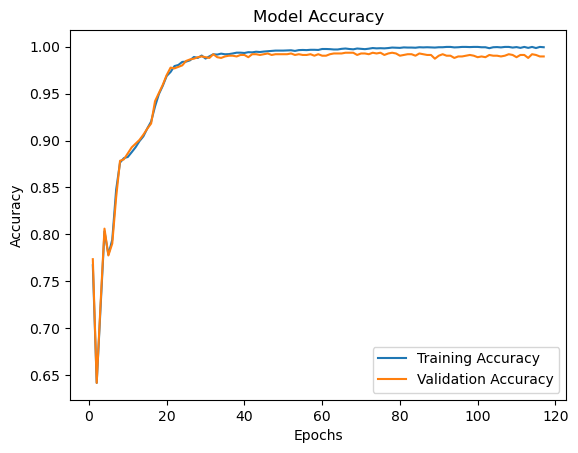

In [196]:
import matplotlib.pyplot as plt
# Assuming you have collected the accuracy values in lists
train_acc = trainAccList  # Example training accuracy values
val_acc = valAccList  # Example validation accuracy values

epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_acc, 'tab:blue', label='Training Accuracy')
plt.plot(epochs, val_acc, 'tab:orange', label='Validation Accuracy')

# Add titles and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [197]:
model1.eval()
output = model1(des_tensor,tweets_tensor,num_prop,category_prop,edge_index,edge_type)
output1= torch.nn.functional.softmax(output, dim=1)[:, 1].detach().numpy()
label=labels.to('cpu').detach().numpy()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(label[test_idx], output1[test_idx])

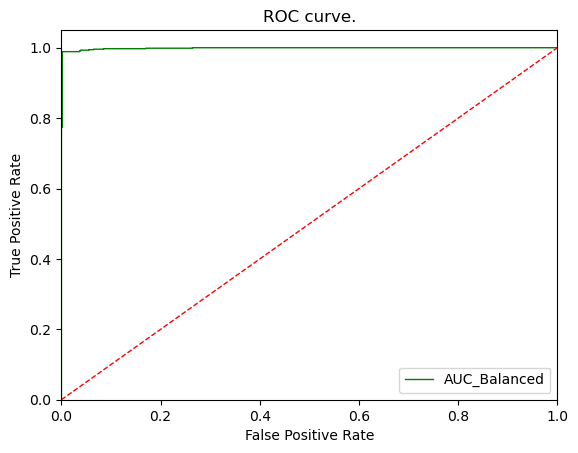

In [198]:
plt.plot(
    fpr,
    tpr,
    color= "g",
    lw=1,
    label= "AUC_Balanced",
)
plt.plot([0, 1], [0, 1], color="r", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve.")
plt.legend(loc="lower right")
plt.show()